In [1]:
%cd ../

/mnt/kireev/pycharm-deploy/vtb


In [2]:
from zipfile import ZipFile

In [3]:
from IPython.display import display

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
import random

In [5]:
!ls -l data

total 7787360
drwxr-xr-x 2 ivan sudo       4096 Feb 17 09:37 baseline_catboost
-rw-r--r-- 1 ivan sudo     197430 Feb 17 08:59 baseline_catboost.zip
-rw-r--r-- 1 ivan sudo      13035 Feb 17 09:22 click_categories.csv
-rw-r--r-- 1 ivan sudo  492816210 Feb 17 08:59 clickstream.zip
-rw-r--r-- 1 ivan sudo  973689909 Feb 18 08:23 clickstream_0.csv
-rw-r--r-- 1 ivan sudo 1087645906 Feb 18 08:24 clickstream_1.csv
-rw-r--r-- 1 ivan sudo 1084009490 Feb 18 08:25 clickstream_2.csv
-rw-r--r-- 1 ivan sudo 1012747736 Feb 18 08:25 clickstream_3.csv
-rw-r--r-- 1 ivan sudo  967169624 Feb 18 08:26 clickstream_4.csv
-rw-r--r-- 1 ivan sudo  976392489 Feb 18 08:27 clickstream_5.csv
-rw-r--r-- 1 ivan sudo         38 Feb 17 08:59 currency_rk.csv
-rw-r--r-- 1 ivan sudo     200290 Feb 17 08:59 mcc_codes.csv
drwxr-xr-x 3 ivan sudo       4096 Feb 17 09:36 sample_submission
-rw-r--r-- 1 ivan sudo       1390 Feb 17 08:59 sample_submission.zip
-rw-r--r-- 1 ivan sudo    1070145 Feb 17 09:25 train_matching.csv
-rw-r--

In [6]:
!wc -l data/*.csv

       403 data/click_categories.csv
  15124894 data/clickstream_0.csv
  16898084 data/clickstream_1.csv
  16838663 data/clickstream_2.csv
  15739401 data/clickstream_3.csv
  15029892 data/clickstream_4.csv
  15165619 data/clickstream_5.csv
         4 data/currency_rk.csv
       600 data/mcc_codes.csv
     17582 data/train_matching.csv
      2932 data/train_matching_0.csv
      2931 data/train_matching_1.csv
      2931 data/train_matching_2.csv
      2931 data/train_matching_3.csv
      2931 data/train_matching_4.csv
      2931 data/train_matching_5.csv
   2572366 data/transactions_0.csv
   2583450 data/transactions_1.csv
   2579527 data/transactions_2.csv
   2568465 data/transactions_3.csv
   2576773 data/transactions_4.csv
   2559993 data/transactions_5.csv
 110273303 total


In [8]:
df_mcc_codes = pd.read_csv('data/mcc_codes.csv')
df_currency_rk = pd.read_csv('data/currency_rk.csv')
df_click_categories = pd.read_csv('data/click_categories.csv')

In [16]:
for df in [df_mcc_codes, df_currency_rk, df_click_categories]:
    display(df.head())

,MCC,Название,Описание
0,742,Ветеринарные услуги,Лицензированные специалисты в основном занимаю...
1,763,Сельскохозяйственные кооперативы,"Ассоциации и кооперативы, которые предоставляю..."
2,780,Услуги садоводства и ландшафтного дизайна,Ландшафтные архитекторы и другие поставщики ус...
3,1520,Генеральные подрядчики – жилое и коммерческое ...,"Генеральные подрядчики, в основном занимающиес..."
4,1711,"Генеральные подрядчики по вентиляции, теплосна...","Специальные торговые подрядчики, которые работ..."


,currency_rk,Name
0,48,RUR
1,50,USD
2,60,EUR


,cat_id,level_0,level_1,level_2
0,1,accessories,NaN,NaN
1,2,accessories,handbags,NaN
2,3,accessories,jewellery,NaN
3,8,accessories,watches,NaN
4,11,age,age_0-5_yo,NaN


In [18]:
df_train_matching = pd.read_csv('data/train_matching.csv')
print(df_train_matching.shape)
df_train_matching.head()

(17581, 2)


,bank,rtk
0,178b387813ac4a63a2200274a9e3876e,e19c0f141e9442c5bdb0d5751f6fba1c
1,47cffa46e6b04389ba91a70735d2c3ff,7df3371aabd349e4ac2de8299238627d
2,f73b767cfd72472aa06df9a69e746aaf,b23d62c7e41145a7ad140a4fcfaafefa
3,48da649603734185b98dcea93484dbc7,63ad789541c54463ad54d0a707b3ab8b
4,37304ef19de542ee8fe8a6f050236525,c0e96de5dd594d948a8b9fde9e6980cb


In [47]:
df_train_matching["bank"].value_counts()

178b387813ac4a63a2200274a9e3876e    1
eb990ba50bec4011a0ecc37d16b3f4b6    1
6e5ce082544c4dfdab46d5a996343a4e    1
f32ee85d394b4e6c8938ffeae7047940    1
23abef387c89432dbe7ac4625b192e69    1
                                   ..
16ce6db73a254c788a07f493329e78e4    1
b29b5dd69c454914a3f22a4a9b799586    1
fc4ab245eab74f7997274511f5f2e22b    1
96ed0e5462174c528624548ab3b6a956    1
54310a61cfb64c4aaa0003ecdb727bf8    1
Name: bank, Length: 17581, dtype: int64

In [46]:
df_train_matching["rtk"].value_counts()

0                                   2910
b49d5755f67f47029506ed91ac9cc24e       1
23819611a54445ba9589bcd1fcbf4321       1
d6c19721484e43bcba2786633e1fd5fc       1
2e057a5a75b14819bbe69bbd6c3c85b4       1
                                    ... 
8e652c55a2934186bc41ed78cdb1662f       1
f4f17cad6aab4a8e92ef3a52f6d484e5       1
20560ffe8cf34ac196b69a12348ccc05       1
cb2e58e78eb94767aed76ab1b4b0499e       1
18848472d2754dfc8c2ee9016370d6a1       1
Name: rtk, Length: 14672, dtype: int64

In [19]:
1 / 0.180474729

5.540941967559347

In [20]:
2 * 0.3492487479 * 0.180474729 / (0.3492487479 + 0.180474729)

0.23797538104108074

# transactions

In [29]:
with ZipFile('data/transactions.zip') as z:
    df_transactions = pd.read_csv(z.open('transactions.csv'))

In [33]:
print(df_transactions.shape)
df_transactions.head()

(19821910, 5)


,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
0,000932580e404dafbecd5916d4640938,5411,48,-361.07230,2020-08-03 08:05:23
1,000932580e404dafbecd5916d4640938,5499,48,-137.31398,2020-08-05 01:27:40
2,000932580e404dafbecd5916d4640938,5499,48,-138.84981,2020-08-05 03:28:11
3,000932580e404dafbecd5916d4640938,4829,48,-309.47653,2020-08-06 00:36:29
4,000932580e404dafbecd5916d4640938,5411,48,-133.47370,2020-08-09 00:30:13


22533 unique ids, 17581 from matching


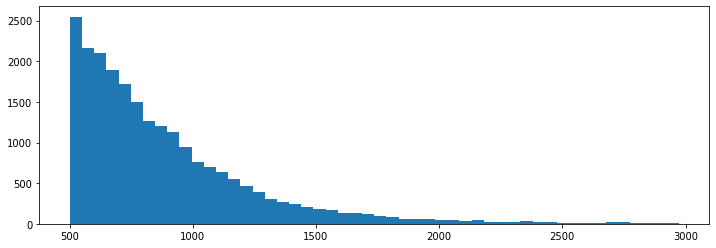

min count: 501, max count: 2972


In [63]:
df = df_transactions['user_id'].value_counts()
print(f'{len(df)} unique ids, {len(df.index.intersection(df_train_matching["bank"]))} from matching')
plt.figure(figsize=(12, 4))
plt.hist(df.values, bins=50)
plt.show()

print(f'min count: {df.min()}, max count: {df.max()}')

(19821910, 386)


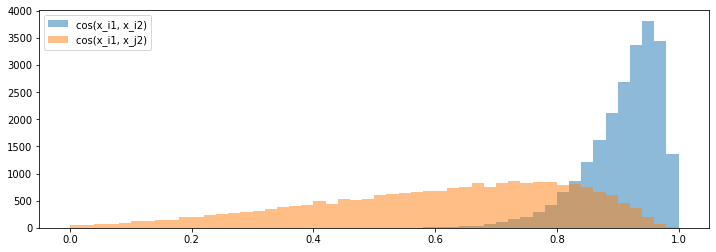

In [118]:
n_samples = 50
ohe_mcc = OneHotEncoder().fit_transform(df_transactions[['mcc_code']])

print(ohe_mcc.shape)
sample_1 = df_transactions.assign(row_id=np.arange(len(df_transactions))) \
    .groupby('user_id')['row_id'].apply(
    lambda x: ohe_mcc[np.random.choice(x, n_samples, replace=False)].sum(axis=0).A[0])
sample_2 = df_transactions.assign(row_id=np.arange(len(df_transactions))) \
    .groupby('user_id')['row_id'].apply(
    lambda x: ohe_mcc[np.random.choice(x, n_samples, replace=False)].sum(axis=0).A[0]).reindex(sample_1.index)

a1 = np.stack(sample_1.values)
a1 = a1 ** 2
a1 = (a1 / a1.sum(axis=1, keepdims=True)) ** 0.5
a2 = np.stack(sample_2.values)
a2 = a2 ** 2
a2 = (a2 / a2.sum(axis=1, keepdims=True)) ** 0.5

plt.figure(figsize=(12, 4))
plt.hist((a1 * a2).sum(axis=1), range=(0, 1), bins=50, alpha=0.5, label='cos(x_i1, x_i2)')
plt.hist((a1 * np.random.permutation(a2)).sum(axis=1), range=(0, 1), bins=50, alpha=0.5, label='cos(x_i1, x_j2)')
plt.legend()
plt.show()

In [120]:
df_transactions['mcc_code'].value_counts()

5411    5665649
5499    1740868
5814    1579958
5921     839260
6011     689507
         ...   
3771          1
3196          1
3056          1
3020          1
3405          1
Name: mcc_code, Length: 386, dtype: int64

In [119]:
df_transactions['currency_rk'].value_counts()

 48    19765158
-1        27405
 50       20364
 60        8983
Name: currency_rk, dtype: int64

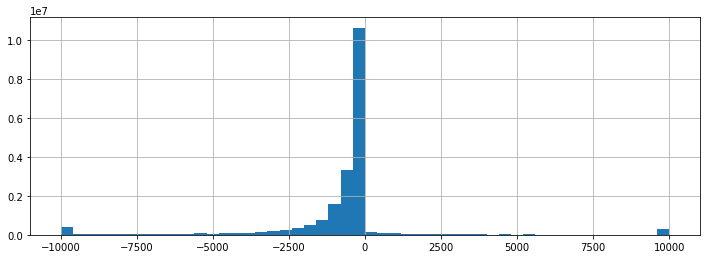

In [122]:
df_transactions['transaction_amt'].clip(-10000, 10000).hist(bins=50, figsize=(12, 4))
plt.show()

# clickstream

In [30]:
with ZipFile('data/clickstream.zip') as z:
    df_clickstream = pd.read_csv(z.open('clickstream.csv'))

In [34]:
print(df_clickstream.shape)
df_clickstream.head()

(126752515, 4)


,user_id,cat_id,timestamp,new_uid
0,000143baebad4467a23b98c918ccda19,165,2021-01-30 20:08:12,1873448
1,000143baebad4467a23b98c918ccda19,165,2021-01-31 20:06:29,1873448
2,000143baebad4467a23b98c918ccda19,308,2021-01-31 20:12:00,1873448
3,000143baebad4467a23b98c918ccda19,931,2021-01-31 22:12:00,1873448
4,000143baebad4467a23b98c918ccda19,931,2021-02-01 16:57:00,1873448


19623 unique ids, 14671 from matching


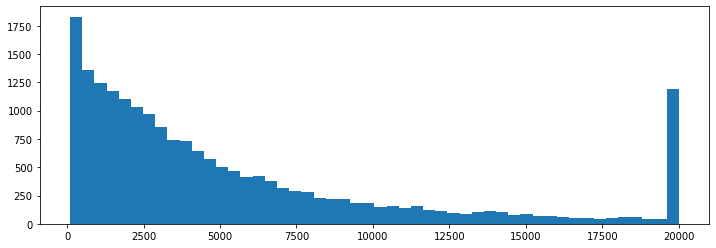

min count: 96, max count: 1315548


In [62]:
df = df_clickstream['user_id'].value_counts()
print(f'{len(df)} unique ids, {len(df.index.intersection(df_train_matching["rtk"]))} from matching')
plt.figure(figsize=(12, 4))
plt.hist(df.values.clip(None, 20000), bins=50)
plt.show()

print(f'min count: {df.min()}, max count: {df.max()}')

(126752515, 402)


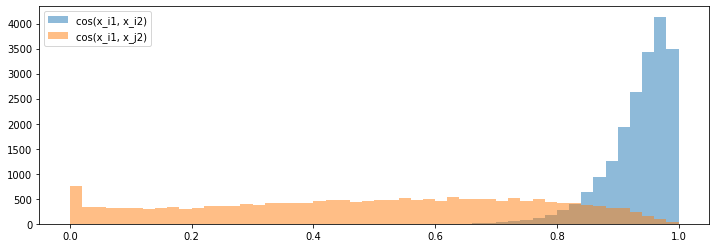

In [117]:
n_samples = 50
ohe_cat_id = OneHotEncoder().fit_transform(df_clickstream[['cat_id']])

print(ohe_cat_id.shape)
sample_1 = df_clickstream.assign(row_id=np.arange(len(df_clickstream))) \
    .groupby('user_id')['row_id'].apply(
    lambda x: ohe_cat_id[np.random.choice(x, n_samples, replace=True)].sum(axis=0).A[0])
sample_2 = df_clickstream.assign(row_id=np.arange(len(df_clickstream))) \
    .groupby('user_id')['row_id'].apply(
    lambda x: ohe_cat_id[np.random.choice(x, n_samples, replace=True)].sum(axis=0).A[0]).reindex(sample_1.index)

a1 = np.stack(sample_1.values)
a1 = a1 ** 2
a1 = (a1 / a1.sum(axis=1, keepdims=True)) ** 0.5
a2 = np.stack(sample_2.values)
a2 = a2 ** 2
a2 = (a2 / a2.sum(axis=1, keepdims=True)) ** 0.5

plt.figure(figsize=(12, 4))
plt.hist((a1 * a2).sum(axis=1), range=(0, 1), bins=50, alpha=0.5, label='cos(x_i1, x_i2)')
plt.hist((a1 * np.random.permutation(a2)).sum(axis=1), range=(0, 1), bins=50, alpha=0.5, label='cos(x_i1, x_j2)')
plt.legend()
plt.show()

In [133]:
df_clickstream['cat_id'].value_counts()

165     30315671
251     21404688
931     20090311
503      6916567
770      4216976
          ...   
26             1
1711           1
370            1
149            1
260            1
Name: cat_id, Length: 402, dtype: int64

In [136]:
df_click_categories.set_index('cat_id').reindex(df_clickstream['cat_id'].value_counts().index)

,level_0,level_1,level_2
165,computers,NaN,NaN
251,film_lovers,NaN,NaN
931,tech,NaN,NaN
503,periodicals_and_themed_portals,NaN,NaN
770,equipment_brands,NaN,NaN
...,...,...,...
26,beauty,beauty_devices,NaN
1711,health,medical_test,NaN
370,health,mild_diseases,NaN
149,celebrations,christmas_and_new_year,NaN


In [141]:
df_clickstream['new_uid'].value_counts()

689832     48235
1654555    48054
1643109    47984
1340329    47938
1035409    47710
           ...  
868094        95
1279167       95
108850        94
1742291       94
459286        94
Name: new_uid, Length: 81285, dtype: int64

In [144]:
df_clickstream.groupby(['user_id', 'new_uid'])['cat_id'].count().reset_index() \
.groupby('new_uid')['cat_id'].count().sort_values()

new_uid
21         1
1251121    1
1251119    1
1251106    1
1251094    1
          ..
621497     1
621487     1
621483     1
621557     1
1873964    1
Name: cat_id, Length: 81285, dtype: int64

In [145]:
df_clickstream.groupby(['user_id', 'new_uid'])['cat_id'].count().reset_index() \
.groupby('user_id')['cat_id'].count().sort_values()

user_id
6f52c45187fa453994792e653991b54a      1
43f42a8fb6b249ffb83df673ad3798d9      1
dc17a3af50da4617a05b3ea1392f1a82      1
dc17a0c182ea42d99f231e4b588c87b2      1
dc1742f456fe4d4d8edd9ebc3ac49c1e      1
                                   ... 
02ea216bac2e411fb5294c657a0490d4    139
62ac54d4fb3647e0b548bff90a8e0659    141
70af5fdba7704654bd3e7a836f89f4e7    143
174017f7dc7c4268a5a6dd4e7e6e8ff5    225
679af3c1732c4495a0c1b1c6884d4213    419
Name: cat_id, Length: 19623, dtype: int64

# Validation schema

17581 bank clients matched with 14671 rtk clients.

4952 bank clients without matching, 4952 rtk clients without matching.

3K in public test, 3K in private test part.


Split train into 6 folds by 2930 clients. One for test, one for validation, 4 for train.
11720 - train, 2930 - valid, 2930 - test.

With 4952 unmatched train will be 16672

19.8M transactions, 126.8M links.
Extra:
 - 6.8M trx from gender (currency mapped to RUR)
 - 1M trx from rosbank
 - 443M trx from alphabattle (frequency mapping required)
 
 
Splits in files, also unmatched data.
Modules:
- train(files) -> (models by epochs)
- inference(file, model) -> submission
- estimate(submission) -> score

Run: run_id (tensorboad version), fold_id


Ideas:
- use unmatched data as negative samples
- use unmatched data for embedding learning in CoLES framefork
- words in mcc names and click categories
- use time information


In [146]:
df = df_clickstream[lambda x: x['user_id'].eq('000143baebad4467a23b98c918ccda19')]

In [147]:
df.head()

,user_id,cat_id,timestamp,new_uid
0,000143baebad4467a23b98c918ccda19,165,2021-01-30 20:08:12,1873448
1,000143baebad4467a23b98c918ccda19,165,2021-01-31 20:06:29,1873448
2,000143baebad4467a23b98c918ccda19,308,2021-01-31 20:12:00,1873448
3,000143baebad4467a23b98c918ccda19,931,2021-01-31 22:12:00,1873448
4,000143baebad4467a23b98c918ccda19,931,2021-02-01 16:57:00,1873448


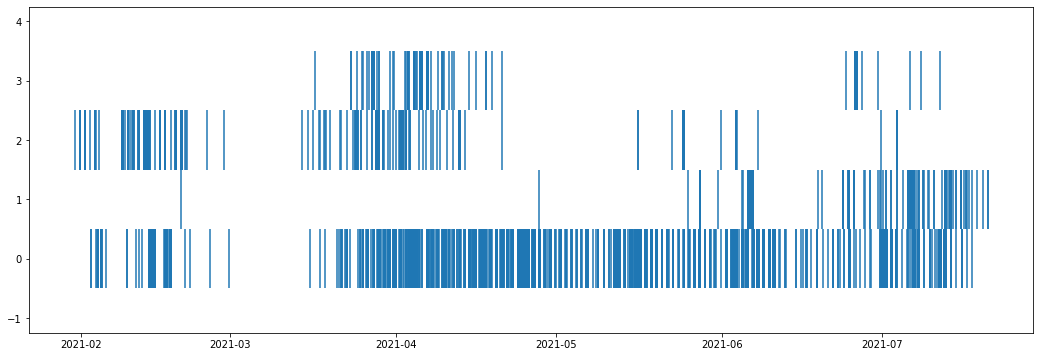

In [180]:
plt.figure(figsize=(18, 6))
plt.eventplot(pd.to_datetime(df['timestamp']).values.reshape(-1, 1),
              lineoffsets=df['new_uid'].map({k: i for i, k in enumerate(df['new_uid'].value_counts().index)}).values)
plt.show()

In [17]:
df_clk = pd.read_csv('data/clickstream_1.csv')
df_clk.head()

,user_id,cat_id,timestamp,new_uid
0,000eb2d39f4f4df0afd630c4f11ca049,503,2021-01-29 21:16:41,782597
1,000eb2d39f4f4df0afd630c4f11ca049,251,2021-01-29 22:35:36,782597
2,000eb2d39f4f4df0afd630c4f11ca049,770,2021-01-31 20:45:00,782597
3,000eb2d39f4f4df0afd630c4f11ca049,770,2021-02-03 08:48:00,782597
4,000eb2d39f4f4df0afd630c4f11ca049,770,2021-02-03 09:19:00,782597


In [18]:
df_clk = df_clk.set_index('user_id')

In [20]:
df_clk.groupby('user_id')['cat_id'].count().sort_values().iloc[::100]

user_id
518254a453e34975b58bbb0419bcc38b       96
674cca2ab925420b9d64cc0c757273ec      234
0b3b12cb1b894db18cc72178333a0963      433
a476f9df035d427a9bee9eaa0e3c0e05      673
207c41de5d65476ab91a24054407f1c9      918
fcb77096c57d4ccc908ce325c9e5c2d6     1168
795111ce1548403fabb05d887c14abdb     1415
a11d63705afc4aeaaae536535b505abd     1662
56c0eddd35ad4c66b959819a13a215db     1989
afa6389878664fae9af2c95c4e34a130     2269
40acb83d2931483daf840ad46bfb2f44     2585
6fef50c7ae434a64a255ff452ac3cdf8     2936
f5feee7108f64e2abf392733cfed2019     3295
904e01da3c0f458faa4d3abfb6b25ff4     3702
f849f76d3784420d9fccb8487fb769d7     4117
96ee75839e074090842d50e6cf342636     4600
fb0af9b00ee44039ab0289c0f3831a81     5358
f965a476c56a459d9965d93775a9d910     6016
043200e0678f4ecc93fe48bd95230999     6780
0bf9489094ab4eef8f039560e83bb8d7     7985
aeeba57e5f7f4b88b38151ec257ceb61     9431
0d67a62051e14dc3b50d315716cc22a4    11524
5184c74219234ad4a8ef623eb53681c4    14769
1c73944160d248eba6bbcb186a

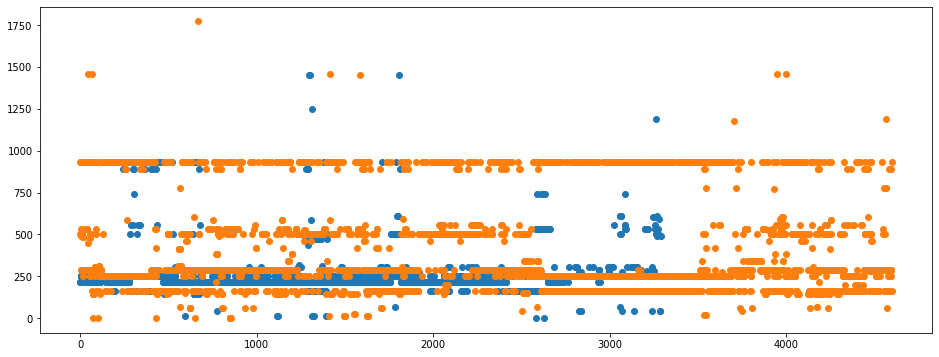

In [29]:
plt.figure(figsize=(16, 6))
df = df_clk.loc['f5feee7108f64e2abf392733cfed2019']['cat_id']
plt.scatter(
    np.arange(len(df)),
    df,
)
df = df_clk.loc['96ee75839e074090842d50e6cf342636']['cat_id']
plt.scatter(
    np.arange(len(df)),
    df,
)
plt.show()

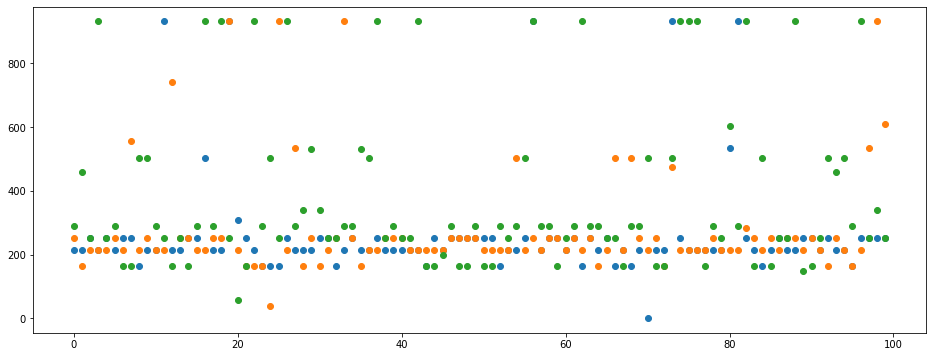

In [32]:
plt.figure(figsize=(16, 6))
df = df_clk.loc['f5feee7108f64e2abf392733cfed2019']['cat_id'].sample(100, replace=False)
plt.scatter(
    np.arange(len(df)),
    df,
)
df = df_clk.loc['f5feee7108f64e2abf392733cfed2019']['cat_id'].sample(100, replace=False)
plt.scatter(
    np.arange(len(df)),
    df,
)
df = df_clk.loc['96ee75839e074090842d50e6cf342636']['cat_id'].sample(100, replace=False)
plt.scatter(
    np.arange(len(df)),
    df,
)
plt.show()

175
2407


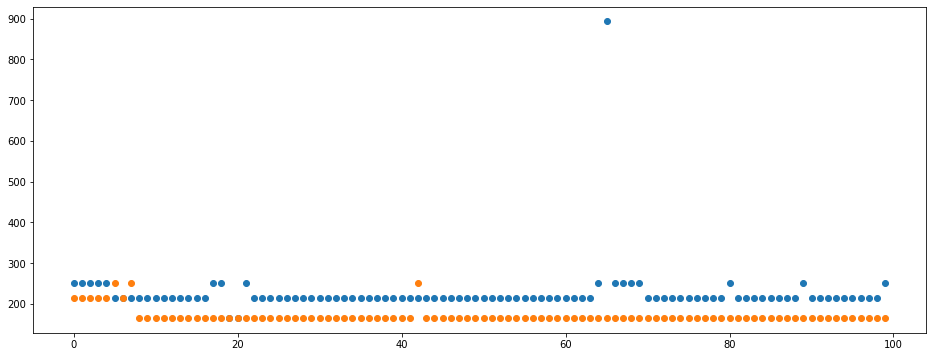

In [45]:
plt.figure(figsize=(16, 6))
df = df_clk.loc['f5feee7108f64e2abf392733cfed2019']['cat_id']
pos = random.randint(0, len(df) - 100)
print(pos)
plt.scatter(
    np.arange(100),
    df.iloc[pos:pos + 100],
)
df = df_clk.loc['f5feee7108f64e2abf392733cfed2019']['cat_id']
pos = random.randint(0, len(df) - 100)
print(pos)
plt.scatter(
    np.arange(100),
    df.iloc[pos:pos + 100],
)
# df = df_clk.loc['96ee75839e074090842d50e6cf342636']['cat_id']
# pos = random.randint(0, len(df) - 100)
# print(pos)
# plt.scatter(
#     np.arange(100),
#     df.iloc[pos:pos + 100],
# )
plt.show()

In [47]:
df.values

array([215, 215, 251, ..., 165, 493, 251])

In [48]:
d = np.diff(df.values, prepend=0)

In [56]:
%%timeit
np.arange(len(df))[d > 0]

11.8 µs ± 206 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [57]:
%%timeit
np.where(d > 0)[0]

7.67 µs ± 97.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
